# FIT5197 2024 S1 Final Assessment

**SPECIAL NOTE:** Please refer to the [assessment page](https://learning.monash.edu/mod/assign/view.php?id=2017255) for rules, general guidelines and marking rubrics of the assessment (the marking rubric for the kaggle competition part will be released near the deadline in the same page). Failure to comply with the provided information will result in a deduction of mark (e.g., late penalties) or breach of academic integrity.

**YOUR NAME**: Yehezkiel Efraim Darmadi

**STUDENT ID**: 34078215

**KAGGLE NAME/ID** (See part 1, Question 5 or part 2, there are penalties if you don't enter it here!!!): Yehezkiel Efraim

Please also enter your details in this [google form](https://forms.gle/isxqfrVnV7ddAj8y8).

# Part 1 Regression (50 Marks)

A few thousand people were questioned in a [life and wellbeing survey](https://www.get-happier.com/) to build a model to predict happiness of an individual. You need to build regression models to optimally predict the variable in the survey dataset called 'happiness' based on any, or all, of the other survey question responses. 

You have been provided with two datasets, ```regression_train.csv``` and ```regression_test.csv```. Using these datasets, you hope to build a model that can predict happiness level using the other variables. ```regression_train.csv``` comes with the ground-truth target label (i.e. happiness level) whereas `regression_test.csv` comes with independent variables (input information) only.

On the order of around 70 survey questions have been converted into predictor variables that can be used to predict happiness. We do not list all the predictor names here, but their names given in the data header can clearly be linked to the survey questions. e.g., the predictor variable 'iDontFeelParticularlyPleasedWithTheWayIAm' corresponds to the survey question 'I don’t feel particularly pleased with the way I am.'

**PLEASE NOTE THAT THE USE OF LIBRARIES ARE PROHIBITED IN THESE QUESTIONS UNLESS STATED OTHERWISE, ANSWERS USING LIBRARIES WILL RECEIVE 0 MARKS**

## Question 1 (NO LIBRARIES ALLOWED) (4 Mark)
Please load the ```regression_train.csv``` and fit a [$\textbf{multiple linear regression model}$](https://en.wikipedia.org/wiki/Linear_regression) with 'happiness' being the target variable. According to the summary table, which predictors do you think are possibly associated with the target variable (use the significance level of 0.01), and which are the **Top 5** strongest predictors? Please write an R script to automatically fetch and print this information.

**NOTE**: Manually doing the above tasks will result in 0 marks.

In [1]:
# ANSWER BLOCK
train_data <- read.csv("./regression_train.csv")
test_data <- read.csv("./regression_test.csv")

model <- lm(happiness ~ ., data = train_data)

# p-values analysis
p_values <- summary(model)$coefficients[, "Pr(>|t|)"]
p_values_df <- data.frame(p_values)
p_values_df$features <- rownames(p_values_df)
rownames(p_values_df) <- NULL
p_values_df <- p_values_df[order(p_values_df$p_values),]
sig_level <- 0.01
p_val_significant_df <- p_values_df[!is.na(p_values_df$p_values) & p_values_df$p_values <= sig_level, ]
p_val_significant_df[1:5,]

,p_values,features
,<dbl>,<chr>
11,6.160552e-75,income80k - 120k
10,2.033722e-47,income50k - 80k
8,1.902543e-39,income200k above
9,1.604206e-33,income20k - 50k
7,4.650658e-29,income15k - 20k


## Question 2 (2 Mark)
[**R squared**](https://en.wikipedia.org/wiki/Coefficient_of_determination) from the summary table reflects that the full model doesn't fit the training dataset well; thus, you try to quantify the error between the values of the ground-truth and those of the model prediction. You want to write a function to predict 'happiness' with the given dataset and calculate the [root mean squared error (rMSE)](https://en.wikipedia.org/wiki/Root-mean-square_deviation) between the model predictions and the ground truths. Please test this function on the full model and the training dataset.

In [2]:
# ANSWER BLOCK
rmse_func <- function(model, df) {
    predictions <- predict(model, df)
    rmse <- sqrt(mean((predictions - df$happiness)^2))
    return(rmse)
}

# calculate the RMSE
full_model_train_rmse <- rmse_func(model, train_data)
print(
    paste0("This is training data RMSE: ", full_model_train_rmse)
)

[1] "This is training data RMSE: 6.67255660795814"


## Question 3 (2 Marks)
You find the full model complicated and try to reduce the complexity by performing [bidirectional stepwise regression](https://en.wikipedia.org/wiki/Stepwise_regression) with [BIC](https://en.wikipedia.org/wiki/Bayesian_information_criterion).

Calculate the **rMSE** of this new model with the function that you implemented previously. Is there anything you find unusual? Explain your findings in 100 words.

In [3]:
# ANSWER BLOCK
stepwise_model <- step(model, trace = 0, k = log(nrow(train_data)), direction = "both")
summary(stepwise_model)

# calculate the RMSE
step_model_train_rmse <- rmse_func(stepwise_model, train_data)
print(
    paste0("The stepwise model with BIC RMSE on training data: ", step_model_train_rmse)
)


Call:
lm(formula = happiness ~ income + alwaysStressed + alwaysHaveFun + 
    alwaysSerious + alwaysDepressed + iFindMostThingsAmusing + 
    iUsuallyHaveAGoodInfluenceOnEvents, data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-33.365  -4.587  -0.030   5.203  18.888 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        -13.7027     0.6348 -21.587  < 2e-16 ***
income10k - 15k                      6.9401     1.2123   5.725 1.82e-08 ***
income120k - 150k                   12.4102     1.1859  10.465  < 2e-16 ***
income150k - 200k                   12.1301     1.1885  10.206  < 2e-16 ***
income15k - 20k                     14.0070     1.1820  11.851  < 2e-16 ***
income200k above                    20.6292     1.3292  15.519  < 2e-16 ***
income20k - 50k                     22.1535     1.4718  15.052  < 2e-16 ***
income50k - 80k                     29.0212     1.6938  17.133  < 2e-16 ***
income80k

[1] "The stepwise model with BIC RMSE on training data: 7.33030486894785"


The RMSE of the full model (6.67) is lower than that of the stepwise model (7.33), suggesting the full model fits the training data better. This difference indicates that while the stepwise model simplifies the model by reducing the number of predictors, it sacrifices some accuracy. The stepwise model’s higher RMSE might also reflect overfitting in the full model or the loss of important predictors during stepwise selection. It’s crucial to balance model complexity and accuracy, as simpler models are often more generalizable to new data despite having slightly higher RMSE on training data.

## Question 4 (2 Mark)
Although stepwise regression has reduced the model complexity significantly, the model still contains a lot of variables that we want to remove. Therefore, you are interested in lightweight linear regression models with ONLY TWO predictors. Write a script to automatically find the best lightweight model which corresponds to the model with the least **rMSE** on the training dataset. Compare the **rMSE** of the best lightweight model with the **rMSE** of the full model - ```lm.fit``` - that you built previously. Give an explanation for these results based on consideration of the predictors involved.

In [4]:
# ANSWER BLOCK
# get the selected features from the stepwise model
selected_features <- colnames(train_data)[colnames(train_data) != "happiness"]

# create combination of features
predictor_pairs <- combn(selected_features, 2, simplify = FALSE)

best_model <- NULL
best_rmse <- Inf
best_pair <- NULL

for (pair in predictor_pairs) {
    # create formula
    formula <- as.formula(paste("happiness ~", paste(paste0("`", pair, "`"), collapse = " + ")))
    
    # Fit the model
    model <- lm(formula, data = train_data)

    # Calculate RMSE for the current model
    rmse <- rmse_func(model, train_data)

    # Update the best model if the current model has a lower RMSE and also keep the best pair
    if (rmse < best_rmse) {
        best_model <- model
        best_rmse <- rmse
        best_pair <- pair
    }
}

print(
    paste0("The top predictors are: ", paste(best_pair, collapse = ", and "))
)

# calculate the lightweight_model's RMSE
lightweight_model_train_rmse <- rmse_func(best_model, train_data)

print(
    paste0("The lightweight model trin RMSE: ", lightweight_model_train_rmse)
)

print(
    paste0("The full model train RMSE: ", full_model_train_rmse)
)

[1] "The top predictors are: income, and alwaysStressed"
[1] "The lightweight model trin RMSE: 7.88541130213321"
[1] "The full model train RMSE: 6.67255660795814"


### ANSWER (TEXT)

The RMSE for the best lightweight model (7.89) is higher than the RMSE for the full model (6.67). This means the full model, which includes more predictors, fits the training data better than the simpler lightweight model. The top predictors in the lightweight model are “income” and “alwaysStressed,” which significantly impact happiness. However, the full model’s additional predictors capture more complex relationships in the data, resulting in a more accurate fit. Thus, while the lightweight model is simpler, the full model provides a better understanding of the factors influencing happiness by considering more variables.

## Question 5 (Libraries are allowed) (40 Marks)
As a Data Scientist, one of the key tasks is to build models $\textbf{most appropriate/closest}$ to the truth; thus, modelling will not be limited to the aforementioned steps in this assignment. To simulate for a realistic modelling process, this question will be in the form of a [Kaggle competition](https://www.kaggle.com/t/ad8c96e412254c138cbec1d9d1c09734) among students to find out who has the best model.

Thus, you **will be graded** by the **rMSE** performance of your model, the better your model, the higher your score. Additionally, you need to describe/document your thought process in this model building process, this is akin to showing your working properly for the mathematic sections. If you don't clearly document the reasonings behind the model you use, we will have to make some deductions on your scores.

This is the [video tutorial](https://www.youtube.com/watch?v=rkXc25Uvyl4) on how to join any Kaggle competition. 

When you optimize your model's performance, you can use any supervised model that you know and feature selection might be a big help as well. [Check the non-exhaustive set of R functions relevant to this unit](https://learning.monash.edu/mod/resource/view.php?id=2017193) for ideas for different models to try.

$\textbf{Note}$ Please make sure that we can install the libraries that you use in this part, the code structure can be:

```install.packages("some package", repos='http://cran.us.r-project.org')```

```library("some package")```

Remember that if we cannot run your code, we will have to give you a deduction. Our suggestion is for you to use the standard ```R version 3.6.1```

You also need to name your final model ``fin.mod`` so we can run a check to find out your performance. A good test for your understanding would be to set the previous $\textbf{BIC model}$ to be the final model to check if your code works perfectly.

**I used the kaggle notebook R version which is, 4.0.5**

In [5]:
# List of required packages
required_packages <- c("caret", "tidyverse", "randomForest", "glmnet", "nnet", "tibble", "MLmetrics", "ggplot2")

# Install any missing packages
for (package in required_packages) {
  if (!require(package, character.only = TRUE)) {
    install.packages(package)
    library(package, character.only = TRUE)
  }
}

# Load the libraries
library(caret)
library(tidyverse)
library(randomForest)
library(glmnet)
library(nnet)
library(tibble)
library(MLmetrics)
library(ggplot2)

Loading required package: caret

Loading required package: ggplot2

Loading required package: lattice

Loading required package: tidyverse

-- Attaching packages --------------------------------------- tidyverse 1.3.2 --
v tibble  3.1.8      v dplyr   1.0.10
v tidyr   1.2.1      v stringr 1.4.1 
v readr   2.1.2      v forcats 0.5.2 
v purrr   0.3.4      
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
x purrr::lift()   masks caret::lift()
Loading required package: randomForest

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:dplyr':

    combine


The following object is masked from 'package:ggplot2':

    margin


Loading required package: glmnet

Loading required package: Matrix


Attaching package: 'Matrix'


The following objects are masked from 'package:tidyr':

   

I will change every categorical features into factor. The reason is for this is:

1. Like question one, the lm function will automatically one-hot encode everything.
2. According to the above questions, the income will play big part in the model. Thus, one-hot encoded it makes the weightage bigger.
3. Some of the categorical features like gender is suitable for the encoded type.

In [6]:
# Identify the categorical columns
categorical_columns <- sapply(train_data, function(col) is.factor(col) | is.character(col))

# Get the names of categorical columns
cat_colnames <- names(train_data)[categorical_columns]

cat_data_tr <- train_data[, cat_colnames]  
cat_data_ts <- test_data[, cat_colnames]

# change every categorical data into factor
for(i in colnames(cat_data_tr)){
    cat_data_tr[[i]] <- as.factor(cat_data_tr[[i]])
    cat_data_ts[[i]] <- as.factor(cat_data_ts[[i]])
}

As for the rest of the features, I will make everything above 0. The reason is that I want to do polynomial degree and for every even degree, it wont be making sense if the negative value is the same as the positive values.

In [7]:
# Select the rest of the colmns excluding the categorical columns and happiness
non_categorical_columns <- setdiff(colnames(train_data %>% select(-happiness)), cat_colnames)
non_cat_data_tr <- train_data[, non_categorical_columns]
non_cat_data_ts <- test_data[, non_categorical_columns]

# make function to convert every values into more than 0
make_sequential <- function(data, cols) {
  for (col in cols) {
    # Get the column values
    values <- data[[col]]
    
    # Shift values to ensure minimum value is 1
    min_value <- min(values)
    data[[col]] <- values - min_value + 1
  }
  return(data)
}

# get the colnames of the non_cat_data_tr
columns_to_sequential <- colnames(non_cat_data_tr)

# transform each values
non_cat_data_tr <- make_sequential(non_cat_data_tr, columns_to_sequential)
non_cat_data_ts <- make_sequential(non_cat_data_ts, columns_to_sequential)

In [8]:
# combine the columns and add happiness
final_data_tr <- cbind(cat_data_tr, non_cat_data_tr)
final_data_tr$happiness <- train_data$happiness

final_data_ts <- cbind(cat_data_ts, non_cat_data_ts)

str(final_data_tr)

'data.frame':	500 obs. of  43 variables:
 $ gender                                                         : Factor w/ 3 levels "Female","Male",..: 2 1 2 2 2 2 1 2 2 1 ...
 $ income                                                         : Factor w/ 9 levels "0 - 10k","10k - 15k",..: 6 6 3 3 9 9 7 3 8 5 ...
 $ whatIsYourHeightExpressItAsANumberInMetresM                    : Factor w/ 10 levels "140 - 150","150 - 155",..: 5 5 7 7 7 6 3 7 7 3 ...
 $ doYouFeelASenseOfPurposeAndMeaningInYourLife104                : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ howDoYouReconcileSpiritualBeliefsWithScientificOrRationalThinki: Factor w/ 3 levels "They are separate",..: 3 2 2 3 3 1 1 3 1 2 ...
 $ howOftenDoYouFeelSociallyConnectedWithYourPeersAndFriends      : Factor w/ 4 levels "Always","Never",..: 4 3 4 3 4 4 4 2 4 2 ...
 $ doYouHaveASupportSystemOfFriendsAndFamilyToTurnToWhenNeeded    : Factor w/ 4 levels "No","Yes, I have both",..: 2 2 2 2 4 2 3 2 2 2 ...
 $ howOftenDoYouPartic

Next, I will do feature selections using Random Forest. The reason is that the Random Forest eliminates values and also give the feature important scores.

In [9]:
# create rf model
set.seed(42)
rf_model <- randomForest(happiness ~ ., data = final_data_tr, importance = TRUE)

# Extract feature importance scores
importance_scores <- importance(rf_model)
importance_df <- data.frame(Feature = rownames(importance_scores), Importance = importance_scores[, 'IncNodePurity'])

# Select features with high importance
importance_df <- importance_df %>% arrange(desc(Importance))
selected_features_df <- importance_df[1:30,]

# Print the selected features
print(selected_features_df)

                                                                                                                        Feature
income                                                                                                                   income
alwaysStressed                                                                                                   alwaysStressed
whatIsYourHeightExpressItAsANumberInMetresM                                         whatIsYourHeightExpressItAsANumberInMetresM
iDontFeelParticularlyPleasedWithTheWayIAm                                             iDontFeelParticularlyPleasedWithTheWayIAm
alwaysAnxious                                                                                                     alwaysAnxious
alwaysCalm                                                                                                           alwaysCalm
alwaysHaveFun                                                                                           

Next, I want to avoid making polynomial features out of the categorical values. Thus, I am going to seperate the colnames for categorical features.

In [10]:
# take the selected features 
selected_features <- selected_features_df$Feature

# take the categorical features colnames
feature_cat_df <- selected_features_df %>% filter(Feature %in% cat_colnames)
feature_cat_names <-feature_cat_df$Feature

# take the non categorical features colnames
feature_not_cat_df <- selected_features_df %>% filter(!Feature %in% cat_colnames)
feature_not_cat_names <- feature_not_cat_df$Feature

Let's split the data into the training and validation dataset

In [11]:
set.seed(42)
# Subset the data to include only the selected features
selected_train <- final_data_tr[, selected_features]
selected_train$happiness <- final_data_tr$happiness

# Create data partition
trainIndex <- createDataPartition(selected_train$happiness, p = 0.8, list = FALSE, times = 1)

# Split the data into training and validation sets
trainData <- selected_train[trainIndex, ]
validationData <- selected_train[-trainIndex, ]

I will build parametric model because after trying the model with just basic lm and rpart function, I found that lm works better. Thus, I am sticking with parametric models.

To get the parametric model perform well, there two things that we can do:

1. Feature engineering
2. Regularization

Feature engineering such as polynomial degrees are useful to make the model learn better since the parametric models do not have lots of hyperparameter like non-parametric models.

The regularization such as L1, L2, and elastic net are very useful to keep the model from overfitting.

Let's create the polynomial degree from the non-categorical features according to the importance level.

In [12]:
# empty variable to stores the polynomial features
poly_degree_list <- c()

# for looping from 2 to 5 (the maximum number of unique value in the features)
for(i in 2:5){
    for(j in feature_not_cat_names){
        # if the i is less than the length of the unique values of the features then skip it
        if(i < length(unique(final_data_tr[[j]]))){
            # creating the formula
            poly_feat <- paste0("I(", j, "^", i, ")")
            poly_degree_list <- c(poly_degree_list, poly_feat)
        }
    }
}
print(poly_degree_list)

# create variable to store the whole features that are going to be tested
features <- c(selected_features, poly_degree_list)

 [1] "I(alwaysStressed^2)"                            
 [2] "I(iDontFeelParticularlyPleasedWithTheWayIAm^2)" 
 [3] "I(alwaysAnxious^2)"                             
 [4] "I(alwaysCalm^2)"                                
 [5] "I(alwaysHaveFun^2)"                             
 [6] "I(iFindMostThingsAmusing^2)"                    
 [7] "I(alwaysDepressed^2)"                           
 [8] "I(iUsuallyHaveAGoodInfluenceOnEvents^2)"        
 [9] "I(iAmWellSatisfiedAboutEverythingInMyLife^2)"   
[10] "I(iLaughALot^2)"                                
[11] "I(lifeIsGood^2)"                                
[12] "I(iAmIntenselyInterestedInOtherPeople^2)"       
[13] "I(iAlwaysHaveACheerfulEffectOnOthers^2)"        
[14] "I(iFeelThatLifeIsVeryRewarding^2)"              
[15] "I(iFeelThatIAmNotEspeciallyInControlOfMyLife^2)"
[16] "I(iDoNotThinkThatTheWorldIsAGoodPlace^2)"       
[17] "I(alwaysSerious^2)"                             
[18] "I(myBodyIsHypermobileAndLovesToMove^2)"         
[19] "I(iD

Let's analyze the RMSE for each of the number of features for the lm model.

In [13]:
# empty variables to store the RMSE value
rmse_tr <- c()
rmse_vl <- c()

# for looping the number of features to be tested.
for(i in 1:length(features)){
    # create the formula
    formula <- as.formula(paste("happiness ~", paste(features[1:i], collapse = " + ")))
    # create the model
    model <- lm(formula, data = trainData)
    # store the RMSE scores
    rmse_tr[i] <- rmse_func(model, trainData)
    rmse_vl[i] <- rmse_func(model, validationData)
}

Let's plot the RMSE training vs the validation training

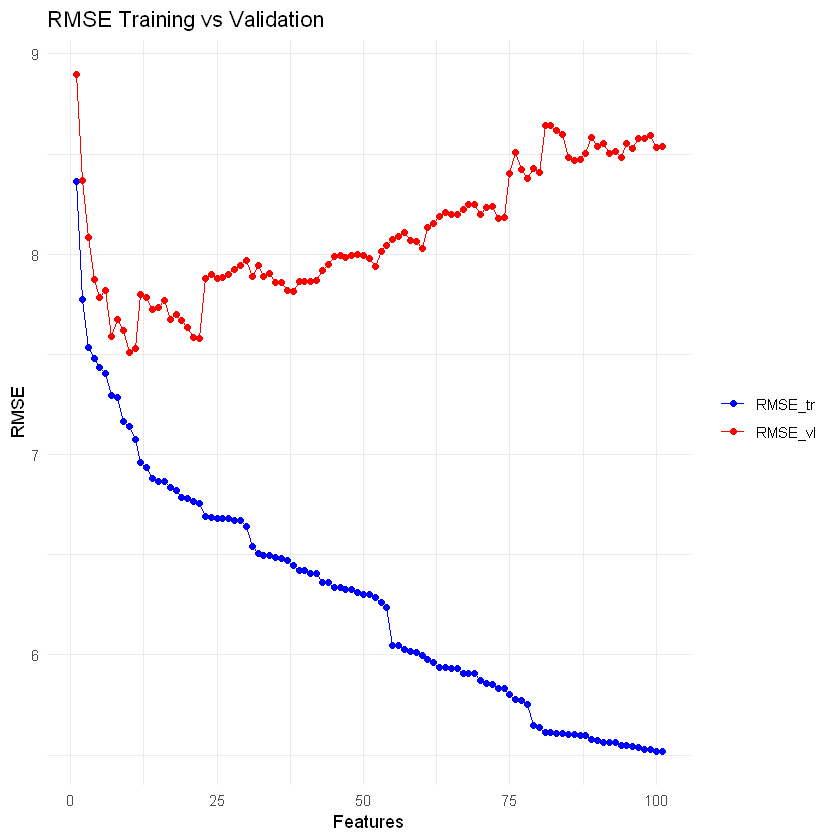

In [14]:
# Combine data into a data frame
df <- data.frame(
  Index = 1:length(rmse_tr),
  RMSE_tr = rmse_tr,
  RMSE_vl = rmse_vl
)

# Reshape data into long format using pivot_longer
df_long <- df %>%
  pivot_longer(cols = -Index, names_to = "Variable", values_to = "Value")

# Create the plot using ggplot2
ggplot(data = df_long, aes(x = Index, y = Value, color = Variable, group = Variable)) +
  geom_line() +
  geom_point() +
  labs(x = "Features", y = "RMSE", title = "RMSE Training vs Validation") +
  scale_color_manual(values = c("RMSE_tr" = "blue", "RMSE_vl" = "red")) +
  theme_minimal() +
  theme(legend.title = element_blank())

After trying so many combinations, I chose to kind of overfit my model first and uses the elastic net regression to regularize the regression models.

The number of features up until 78 works best with the model.

In [15]:
# create the final and testing model
fin_formula <- as.formula(paste("happiness ~", paste(features[1:78], collapse = " + ")))
test_formula <- as.formula(paste("~", paste(features[1:78], collapse = " + ")))

# create model matrix for the train and validation dataset to be fitted in the glm function
x_train <- model.matrix(fin_formula, trainData)[, -1]  # Remove intercept term
y_train <- trainData$happiness
x_val <- model.matrix(fin_formula, validationData)[, -1]
y_val <- validationData$happiness

Let's train the model on the trainData first to see the performance

In [18]:
set.seed(42)
# Elastic Net regression (alpha = 0.5)
elastic_net_model <- cv.glmnet(x_train, y_train, alpha = 0.5)
print(elastic_net_model)

# predict the x_train and x_val
elastic_pred_train <- predict(elastic_net_model, s = elastic_net_model$lambda.min, newx = x_train)
elastic_pred_val <- predict(elastic_net_model, s = elastic_net_model$lambda.min, newx = x_val)

# get the RMSE vallues
elastic_rmse_train <- sqrt(mean((y_train - elastic_pred_train)^2))
elastic_rmse_val <- sqrt(mean((y_val - elastic_pred_val)^2))
print(paste("Elastic Net Training RMSE:", elastic_rmse_train))
print(paste("Elastic Net Validation RMSE:", elastic_rmse_val))

# Calculate the cross-validated RMSE
cv_elastic_mse <- elastic_net_model$cvm[elastic_net_model$lambda == elastic_net_model$lambda.min]
cv_elastic_rmse <- sqrt(cv_elastic_mse)
print(paste("CV Elastic RMSE:", cv_elastic_rmse))


Call:  cv.glmnet(x = x_train, y = y_train, alpha = 0.5) 

Measure: Mean-Squared Error 

    Lambda Index Measure    SE Nonzero
min 0.2828    42   58.89 5.843      56
1se 0.8637    30   64.32 6.373      38
[1] "Elastic Net Training RMSE: 6.65395019401319"
[1] "Elastic Net Validation RMSE: 7.53351135040194"
[1] "CV Elastic RMSE: 7.67394318248639"


As you can see, the model are not too overfitted.

Let's build the final model.

In [21]:
# create model matrix for the train and validation dataset to be fitted in the glm function
x_final <- model.matrix(fin_formula, final_data_tr)[, -1]
y_final <- final_data_tr$happiness

# Elastic Net regression (alpha = 0.5)
set.seed(42)
fin_elastic_net_model <- cv.glmnet(x_final, y_final, alpha = 0.5)
print(fin_elastic_net_model)

# Calculate the cross-validated RMSE
cv_elastic_mse <- fin_elastic_net_model$cvm[fin_elastic_net_model$lambda == fin_elastic_net_model$lambda.min]
cv_elastic_rmse <- sqrt(cv_elastic_mse)
print(paste("Fin CV Elastic RMSE:", cv_elastic_rmse))


Call:  cv.glmnet(x = x_final, y = y_final, alpha = 0.5) 

Measure: Mean-Squared Error 

    Lambda Index Measure    SE Nonzero
min 0.2808    42   57.64 4.476      44
1se 0.7814    31   61.63 5.760      33
[1] "Fin CV Elastic RMSE: 7.59208876027628"


Let's export the model.

In [22]:
# export the model.
save(fin_elastic_net_model, file = "fin_elastic_net_model.RData")

In [23]:
# Build your final model here, use additional coding blocks if you need to
load("fin_elastic_net_model.RData")
fin.mod <-fin_elastic_net_model

In [29]:
# get the testing data 
test <- model.matrix(test_formula, final_data_ts)[, -1]
# If you are using any packages that perform the prediction differently, please change this line of code accordingly.
pred.label <- predict(fin.mod, s = fin_elastic_net_model$lambda.min, test)
# put these predicted labels in a csv file that you can use to commit to the Kaggle Leaderboard
submission_df <- data.frame("RowIndex" = seq(1, length(pred.label)), "Prediction" = pred.label)
colnames(submission_df) <- c("RowIndex", "Prediction")
write.csv(
    submission_df,  
    "RegressionPredictLabel.csv", 
    row.names = F
)

In [ ]:
## PLEASE DO NOT ALTER THIS CODE BLOCK, YOU ARE REQUIRED TO HAVE THIS CODE BLOCK IN YOUR JUPYTER NOTEBOOK SUBMISSION
## Please skip (don't run) this if you are a student
## For teaching team use only

tryCatch(
    {
        source("../supplimentary.R")
    },
    error = function(e){
        source("supplimentary.R")
    }
)

truths <- tryCatch(
    {
        read.csv("../regression_test_label.csv")
    },
    error = function(e){
        read.csv("regression_test_label.csv")
    }
)


RMSE.fin <- rmse(pred.label, truths$x)
cat(paste("RMSE is", RMSE.fin))

# Part 2 Classification (50 Marks)

A few thousand people were questioned in a [life and wellbeing survey](https://www.get-happier.com/) to build a model to predict happiness of an individual, but this time we want to predict a categorical score for perfect mental health, rather than a continuous score. You need to build 5-class classification models to optimally predict the variable in the survey dataset called 'perfectMentalHealth' based on any, or all, of the other survey question responses. 

You have been provided with two datasets, ```classification_train.csv``` and ```classification_test.csv```. Using these datasets, you hope to build a model that can predict 'perfectMentalHealth' using the other variables. ```classification_train.csv``` comes with the ground-truth target label (i.e. 'perfectMentalHealth' happiness classes) whereas `classification_test.csv` comes with independent variables (input information) only.

On the order of around 70 survey questions have been converted into predictor variables that can be used to predict 'perfectMentalHealth'. We do not list all the predictor names here, but their names given in the data header can clearly be linked to the survey questions. E.g. the predictor variable 'iDontFeelParticularlyPleasedWithTheWayIAm' corresponds to the survey question 'I don’t feel particularly pleased with the way I am.'

This question will also be in the form of a [Kaggle competition](https://www.kaggle.com/t/968d3b346acb47779771f47785c39e62) among students to find out who has the best model.

In [30]:
# Load in the train and test classification data.
test_data <- read.csv("./classification_test.csv")
train_data <- read.csv("./classification_train.csv")

For the Classification competition, I want to change everything to numeric. Because it performs well on the model and some of the categorical features like gender are going to be dropped by the feature selections. While income is a lot better as a numeric feature in this case.

I will also create a lot of polynomial degrees, so it would make sense if I transform most of the features to be more than 0.

In [31]:
# Identify categorical columns
categorical_columns <- sapply(train_data, function(col) is.factor(col) | is.character(col))

# Get the names of categorical columns
cat_colnames <- names(train_data)[categorical_columns]
cat_data_tr <- train_data[, cat_colnames]  
cat_data_ts <- test_data[, cat_colnames]

# Select the rest of the columns excluding categorical columns
non_categorical_columns <- setdiff(colnames(train_data %>% select(-perfectMentalHealth)), cat_colnames)
non_cat_data_tr <- train_data[, non_categorical_columns]
non_cat_data_ts <- test_data[, non_categorical_columns]

# make function to convert every values into more than 0
make_sequential <- function(data, cols) {
  for (col in cols) {
    # Get the column values
    values <- data[[col]]
    
    # Shift values to ensure minimum value is 1
    min_value <- min(values)
    data[[col]] <- values - min_value + 1
  }
  return(data)
}

# get the colnames of the non_cat_data_tr
columns_to_sequential <- colnames(non_cat_data_tr)

# transform each values
non_cat_data_tr <- make_sequential(non_cat_data_tr, columns_to_sequential)
non_cat_data_ts <- make_sequential(non_cat_data_ts, columns_to_sequential)

# combine the data into final_data_tr
final_data_tr <- cbind(cat_data_tr, non_cat_data_tr)
final_data_tr$perfectMentalHealth <- train_data$perfectMentalHealth

final_data_ts <- cbind(cat_data_ts, non_cat_data_ts)


# Convert categorical columns to factors and then to numeric
final_data_tr[categorical_columns] <- lapply(final_data_tr[categorical_columns], function(x) as.numeric(as.factor(x)))
final_data_ts[categorical_columns] <- lapply(final_data_ts[categorical_columns], function(x) as.numeric(as.factor(x)))

# make the target variable as a factor since we want to do classification prediction model
final_data_tr$perfectMentalHealth <- as.factor(train_data$perfectMentalHealth)
final_data_tr <- final_data_tr %>% select(-perfectMentalHealth, perfectMentalHealth)
str(final_data_tr)

'data.frame':	500 obs. of  43 variables:
 $ gender                                                         : num  1 1 2 2 1 1 2 2 1 1 ...
 $ income                                                         : num  2 3 1 9 3 1 8 2 4 1 ...
 $ whatIsYourHeightExpressItAsANumberInMetresM                    : num  3 5 4 4 6 4 7 4 3 4 ...
 $ doYouFeelASenseOfPurposeAndMeaningInYourLife104                : num  2 2 2 2 2 2 2 2 2 2 ...
 $ howDoYouReconcileSpiritualBeliefsWithScientificOrRationalThinki: num  2 3 2 2 1 2 2 2 2 1 ...
 $ howOftenDoYouFeelSociallyConnectedWithYourPeersAndFriends      : num  3 4 3 2 2 4 4 3 4 3 ...
 $ doYouHaveASupportSystemOfFriendsAndFamilyToTurnToWhenNeeded    : num  2 2 2 1 2 2 2 3 2 2 ...
 $ howOftenDoYouParticipateInSocialActivitiesIncludingClubsSportsV: num  3 3 3 1 2 2 2 2 1 5 ...
 $ doYouFeelComfortableEngagingInConversationsWithPeopleFromDiffer: num  4 4 2 2 1 3 4 4 4 4 ...
 $ doYouFeelASenseOfPurposeAndMeaningInYourLife105                : num  2 2 2 1 2 2 2

The model selection that I am going to use is the Random Forest, because it eliminates features and also give the MeanDecreaseAccuracy and MeanDecreaseGini

In [32]:
# create rf model
set.seed(42)
rf_model <- randomForest(perfectMentalHealth ~ ., data = final_data_tr, importance = TRUE)

# Extract feature importance scores
importance_scores <- importance(rf_model)
importance_df <- data.frame(importance_scores) %>% 
    select(MeanDecreaseAccuracy, MeanDecreaseGini) %>%
    rownames_to_column(var = "features") %>%
    arrange(desc(MeanDecreaseAccuracy), desc(MeanDecreaseGini))

# Select features with high importance
selected_features_df <- importance_df[1:21,]

# Print the selected features
print(selected_features_df)
selected_features <- selected_features_df$features

                                                          features
1                                     alwaysLoveAndCareForYourself
2                                                    alwaysHaveFun
3                                                       alwaysCalm
4                                                       lifeIsGood
5                                                   alwaysStressed
6  alwaysEngageInPreparingAndUsingYourSkillsAndTalentsInOrderToGai
7                          iAmWellSatisfiedAboutEverythingInMyLife
8                              iDoNotThinkThatTheWorldIsAGoodPlace
9                       iFeelThatIAmNotEspeciallyInControlOfMyLife
10                                     extremelyGoodAbilityToSense
11                                    iFeelThatLifeIsVeryRewarding
12                                          iFindMostThingsAmusing
13                                                          income
14                      iHaveVeryWarmFeelingsTowardsAlmostEver

I will be choosing parametric model for the classification, it is because I already tried to see the score for the macro F1 score for the basic DT and basic multinomial, and the parametric model F1 score consistently perform well.

Next, let's split the data into train and validation dataset.

In [34]:
set.seed(150)
# Subset the data to include only the selected features
selected_train <- final_data_tr[, selected_features]
selected_train$perfectMentalHealth <- final_data_tr$perfectMentalHealth

# Create data partition
trainIndex <- createDataPartition(selected_train$perfectMentalHealth, p = 0.8, list = FALSE, times = 1)

# Split the data into training and validation sets
trainData <- selected_train[trainIndex, ]
validationData <- selected_train[-trainIndex, ]

Let's create a function to calculate the macro F1 score.

In [35]:
# Define the function
macro_f1_score <- function(model, df) {
    # Generate predictions
    predictions <- predict(model, df)
    
    # Calculate confusion matrix
    confusion_matrix <- confusionMatrix(predictions, df$perfectMentalHealth)
    
    # Extract F1 scores by class
    f1_scores <- confusion_matrix$byClass[, "F1"]
    
    # Calculate the macro F1 score
    macro_f1_score <- mean(f1_scores, na.rm = TRUE)
    
    # Print the macro F1 score
    return(macro_f1_score)
}

Let's create the polynomial degree

In [36]:
# empty variable to stores the polynomial features
poly_degree_list <- c()

for(i in 2:10){
    for(j in selected_features){
        if(i < length(unique(final_data_tr[[j]]))){
            poly_feat <- paste0("I(", j, "^", i, ")")
            poly_degree_list <- c(poly_degree_list, poly_feat)
        }
    }
}

# create the variable that store the features
features <- c(selected_features, poly_degree_list)

Let's analyze the F1 score for every possible number of features

In [37]:
# store variables to store the F1 score
macro_f1_tr <- c()
macro_f1_vl <- c()

# for looping the number of features
for(i in 1:length(features)){
    # create the formula
    formula <- as.formula(paste("perfectMentalHealth ~", paste(features[1:i], collapse = " + ")))
    # create the model
    model <- multinom(formula, data = trainData, trace = FALSE)
    # store the F1 score
    macro_f1_tr[i] <- macro_f1_score(model, trainData)
    macro_f1_vl[i] <- macro_f1_score(model, validationData)
}

Let's plot the F1 scores.

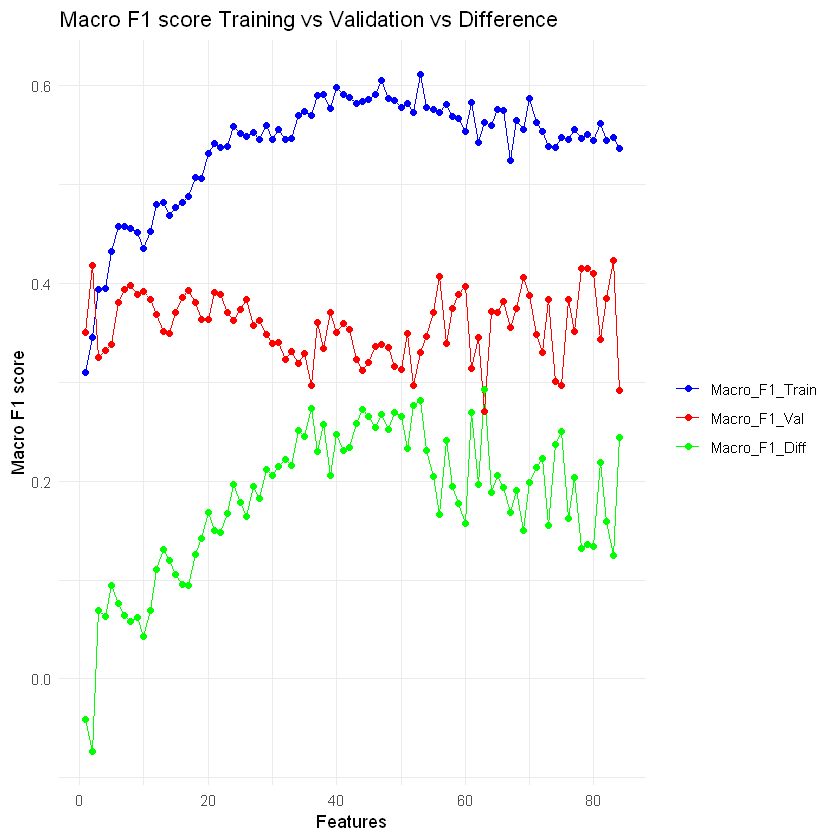

In [39]:
# get the difference between the training and validation F1 scores
macro_f1_diff <- macro_f1_tr - macro_f1_vl

# Combine data into a data frame
df <- data.frame(
  Index = 1:length(macro_f1_tr),
  Macro_F1_Train = macro_f1_tr,
  Macro_F1_Val = macro_f1_vl,
  Macro_F1_Diff = macro_f1_diff
)

# Reshape data into long format using pivot_longer
df_long <- df %>%
  pivot_longer(cols = -Index, names_to = "Variable", values_to = "Value")

# Create the plot using ggplot2
ggplot(data = df_long, aes(x = Index, y = Value, color = Variable, group = Variable)) +
  geom_line() +
  geom_point() +
  labs(x = "Features", y = "Macro F1 score", title = "Macro F1 score Training vs Validation vs Difference") +
  scale_color_manual(values = c("Macro_F1_Train" = "blue", "Macro_F1_Val" = "red", "Macro_F1_Diff" = "green")) +
  theme_minimal() +
  theme(legend.title = element_blank())

After trying so many values for the number of features, 55 features work the best for the model.

Let's assess it on the trainData

In [40]:
# create the final formula
fin_formula <- as.formula(
    paste(
        "perfectMentalHealth ~", 
        paste(features[1:55], collapse = " + ")
    )
)

# create the model
model <- multinom(fin_formula, data = trainData)

# calculate the F1 score
print(
    paste("The F1 score for the trainData is", macro_f1_score(model, trainData))
)
print(
    paste("The F1 score for the validationData is", macro_f1_score(model, validationData))
)

# weights:  285 (224 variable)
initial  value 646.994041 
iter  10 value 544.716847
iter  20 value 523.368412
iter  30 value 513.093137
iter  40 value 506.630829
iter  50 value 501.216539
iter  60 value 497.575898
iter  70 value 486.612942
iter  80 value 475.514426
iter  90 value 455.675880
iter 100 value 417.081255
final  value 417.081255 
stopped after 100 iterations
[1] "The F1 score for the trainData is 0.575702488085092"
[1] "The F1 score for the validationData is 0.370701722133259"


The F1 scores suggest that the model is good but a bit overfit. 

Now let's create the final model using the cross validation and also the decay value to make the model not overfitting.

In [41]:
# create new vairable to be transformed and put into the final model
cv_final_data_tr <- final_data_tr

# Print the modified levels to verify
print(levels(cv_final_data_tr$perfectMentalHealth))

# Convert levels to valid R variable names
levels(cv_final_data_tr$perfectMentalHealth) <- make.names(levels(cv_final_data_tr$perfectMentalHealth))

# Print the modified levels to verify
print(levels(cv_final_data_tr$perfectMentalHealth))

[1] "-2" "-1" "0"  "1"  "2" 
[1] "X.2" "X.1" "X0"  "X1"  "X2" 


In [42]:
# Define the parameter grid for cross-validation
tune_grid <- expand.grid(
  decay = c(0.02, 0.03, 0.04, 0.05)
)

# Define the control function for train with cross-validation
train_control <- trainControl(
  method = "cv",    # Cross-validation
  number = 5,       # Number of folds
  summaryFunction = multiClassSummary,
  classProbs = TRUE
)

set.seed(150)
# Train the model with cross-validation
cv_model <- train(
  fin_formula,
  data = cv_final_data_tr,
  method = "multinom",
  trControl = train_control,
  tuneGrid = tune_grid,
    trace = FALSE
)

# Print the best hyperparameters and results
print(cv_model$bestTune)
print(cv_model)


# Define the reference mapping
reference_levels <- c("X.2", "X.1", "X0", "X1", "X2")
numeric_values <- c(-2, -1, 0, 1, 2)
# Create a named vector for mapping
mapping <- setNames(numeric_values, reference_levels)

# Generate predictions
predictions <- predict(cv_model, cv_final_data_tr)

# Calculate confusion matrix
confusion_matrix <- confusionMatrix(predictions, cv_final_data_tr$perfectMentalHealth)

# Extract F1 scores by class
f1_scores <- confusion_matrix$byClass[, "F1"]

# Calculate the macro F1 score
macro_f1score <- mean(f1_scores, na.rm = TRUE)

# Print the macro F1 score
print(
    paste("The F1 Score is", macro_f1score)
)

  decay
4  0.05
Penalized Multinomial Regression 

500 samples
 21 predictor
  5 classes: 'X.2', 'X.1', 'X0', 'X1', 'X2' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 400, 400, 399, 399, 402 
Resampling results across tuning parameters:

  decay  logLoss   AUC        prAUC      Accuracy   Kappa      Mean_F1  
  0.02   1.614543  0.6910394  0.3221214  0.3378185  0.1497652  0.3326685
  0.03   1.610869  0.6912849  0.3214725  0.3378185  0.1497652  0.3326685
  0.04   1.607581  0.6916060  0.3213252  0.3378185  0.1494146  0.3326984
  0.05   1.607151  0.6921548  0.3217376  0.3458185  0.1602466  0.3400810
  Mean_Sensitivity  Mean_Specificity  Mean_Pos_Pred_Value  Mean_Neg_Pred_Value
  0.3439135         0.8287998         0.3290762            0.8295531          
  0.3439135         0.8287998         0.3290762            0.8295531          
  0.3439135         0.8286798         0.3294045            0.8294216          
  0.3515392         0.8308788         0.3372

Let's save the final model.

In [43]:
# Save the model to a file
save(cv_model, file = "cv_multinom_model.RData")

In [44]:
# load the model
load("cv_multinom_model.RData")

# Build your final model here, use additional coding blocks if you need to
fin.mod <- cv_model

# If you are using any packages that perform the prediction differently, please change this line of code accordingly.
pred.label <- predict(fin.mod, final_data_ts)
pred.label <- as.numeric(as.character(mapping[as.character(pred.label)]))
# put these predicted labels in a csv file that you can use to commit to the Kaggle Leaderboard
write.csv(
    data.frame("RowIndex" = seq(1, length(pred.label)), "Prediction" = pred.label),  
    "ClassificationPredictLabel.csv", 
    row.names = F
)

In [ ]:
## PLEASE DO NOT ALTER THIS CODE BLOCK, YOU ARE REQUIRED TO HAVE THIS CODE BLOCK IN YOUR JUPYTER NOTEBOOK SUBMISSION
## Please skip (don't run) this if you are a student
## For teaching team use only

truths <- tryCatch(
    {
        read.csv("../classification_test_label.csv")
    },
    error = function(e){
        read.csv("classification_test_label.csv")
    }
)

f1_score <- F1_Score(truths$x, pred.label)
cat(paste("f1_score is", f1_score))